In [1]:
import numpy as np
import matplotlib.pyplot as plt

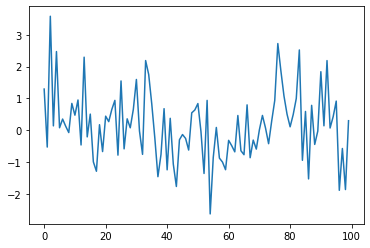

In [80]:
a = 0.0
b = 0.5
T = 100

def gen_ar2(a, b, T):
    X = np.zeros(T)
    X[0] = np.random.normal(0, 1 / (1 - a ** 2 + 0.01))
    X[1] = X[0] * a + np.random.normal(0, 1)

    for t in range(2, T):
        X[t] = a * X[t - 1] + b * X[t - 2] + np.random.normal(0, 1)
        
    return X

def exp_cost_ar(a_true, a_est, s = 1):
    return s + (a_true - a_est) ** 2 * 1 / (1 - a_true ** 2)
    
X = gen_ar2(a, b, T)

plt.plot(X)

In [120]:
## least squares estimate of the regression Y = aX_1 + bX_2
# ((X_1, X_2) (X_1, X_2)^T) ^-1 X Y
a, b, T = 0.5, 0, 100
print(f"True a: {round(a, 2)}. True b: {round(b, 2)}. Time T: {T}.\n")
X = gen_ar2(a, b, T)

lam = 0
X_comb = np.vstack((X[1:-1], X[:-2]))
coefs = np.linalg.inv(X_comb @ X_comb.T) @ X_comb @ X[2:]
print(f"LS Estimates a, b: {np.round(coefs, 3)}.")
print(f"Corresponding emprirical risk (MSE^2): {round(1 / T * np.linalg.norm(X[2:] - coefs @ X_comb, 2) ** 2, 4)}.")
print(f"CV AR(2):\t{round(cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:]), 4)}.")

# least squares estimate of the regression Y = aX_1
a_est = 1 / (np.dot(X[:-1], X[:-1].T)) * X[:-1] @ X[1:]
print(f"\nLS estimate a: {round(a_est, 2)}.")
print(f"Corresponding emprirical risk (MSE^2): {round(1 / T * np.linalg.norm(X[1:] - a_est * X[:-1], 2) ** 2, 4)}.")
print(f"CV AR(1):\t{round(cv_1d(X[:-1], X[1:]), 4)}.")

# least squares estimate of the regression Y = aX_1
b_est = 1 / (np.dot(X[:-2], X[:-2].T)) * X[:-2] @ X[2:]
print(f"\nLS estimate b: {round(b_est, 2)}.")
print(f"Corresponding emprirical risk (MSE^2): {round(1 / T * np.linalg.norm(X[2:] - a_est * X[:-2], 2) ** 2, 4)}.")
print(f"CV AR(2 - 1):\t{round(cv_1d(X[0:-2], X[2:]), 4)}.")

True a: 0.5. True b: 0. Time T: 100.

LS Estimates a, b: [ 0.659 -0.071].
Corresponding emprirical risk (MSE^2): 0.9084.
CV AR(2):	0.9606.

LS estimate a: 0.61.
Corresponding emprirical risk (MSE^2): 0.9134.
CV AR(1):	0.9397.

LS estimate b: 0.33.
Corresponding emprirical risk (MSE^2): 1.4198.
CV AR(2 - 1):	1.3558.


In [256]:
def compare_cvs(a, b, T, iters = 100):
    
    count = 0
    
    # do CV AR(2)
    for i in range(iters):
        X = gen_ar2(a, b, T)
        cv_ar2 = cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:])
        cv_ar1 = cv_1d(X[:-1], X[1:])
        
        count += cv_ar1 < cv_ar2
        
    # check which one achieves lowest MSE
    return count / iters

total_list = []
a_range = np.linspace (-0.05, 0.95, 6)
T_range = [11, 26, 51, 101, 251]

for T in T_range:
    print(T)
    a_list = []
    for a in a_range:
        print(a, end = "\t")
        a_list.append(compare_cvs(a, b, T, iters = 1000))
    total_list.append(a_list)
total_list = np.array(total_list)

11
-0.05	0.15000000000000002	0.35000000000000003	0.55	0.75	0.95	26
-0.05	0.15000000000000002	0.35000000000000003	0.55	0.75	0.95	51
-0.05	0.15000000000000002	0.35000000000000003	0.55	0.75	0.95	101
-0.05	0.15000000000000002	0.35000000000000003	0.55	0.75	0.95	251
-0.05	0.15000000000000002	0.35000000000000003	0.55	0.75	0.95	

### 2D grid

In [255]:
backup_2 = total_list.copy()

In [264]:
print(backup_2)
print(total_list)

[[0.7745 0.774  0.765  0.758  0.764  0.744 ]
 [0.763  0.7665 0.7555 0.7475 0.751  0.7725]
 [0.7555 0.764  0.77   0.7805 0.7635 0.773 ]
 [0.7765 0.7825 0.759  0.7575 0.764  0.7795]
 [0.777  0.7915 0.784  0.764  0.778  0.7645]]
[[0.77425 0.767   0.774   0.7605  0.762   0.7485 ]
 [0.754   0.75275 0.76375 0.75875 0.7605  0.77225]
 [0.75925 0.77    0.759   0.78525 0.76025 0.767  ]
 [0.77825 0.76825 0.7715  0.76475 0.78    0.77375]
 [0.767   0.77625 0.783   0.768   0.7785  0.77825]]


### Function of $a$

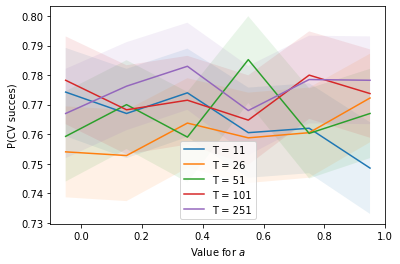

In [265]:
plt.xlabel(r"Value for $a$")
plt.ylabel(r"P(CV succes)")
for i, a_list in enumerate(total_list):
    plt.plot(a_range, a_list, label = f"T = {round(T_range[i], 2)}")
    plt.legend()
    
    dev = 1.96 * np.sqrt(a_list * (1 - a_list) / 3000)
    plt.fill_between(a_range, a_list - dev, a_list + dev, alpha = 0.1)

### Function of $T$

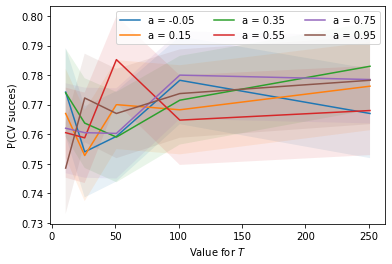

In [266]:
plt.xlabel(r"Value for $T$")
plt.ylabel(r"P(CV succes)")
for i, T_list in enumerate(total_list.T):
    plt.plot(T_range, T_list, label = f"a = {round(a_range[i], 2)}")
    plt.legend(ncol = 3)
    
    dev = 1.96 * np.sqrt(T_list * (1 - T_list) / 3000)
    plt.fill_between(T_range, T_list - dev, T_list + dev, alpha = 0.1)

In [82]:
def cv_1d(features, labels):
    """Leave One Out Cross-Validation for one dimensional features on labels"""
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i), np.delete(labels, i)
        features_test, labels_test = features[i], labels[i]

        # train on del set
        coefs = 1 / (features_del @ features_del.T) * features_del @ labels_del

        # train on test set
        cv_scores.append((labels_test - features_test * coefs) ** 2)
    
    return np.mean(np.array(cv_scores))

def cv_nd(features, labels):
    """Leave One Out Cross-Validation for n > 1 - dimensional features on labels"""
    
    T = np.shape(labels)[0]
    cv_scores = []
    
    # for each sample
    for i in range(T):
        # split data
        features_del, labels_del = np.delete(features, i, axis = 1), np.delete(labels, i)
        features_test, labels_test = features[:, i], labels[i]

        # train on del set
        coefs = np.linalg.inv(features_del @ features_del.T) @ features_del @ labels_del

        # test on test set
        cv_scores.append(((labels_test - features_test @ coefs) ** 2))
        
    return np.mean(np.array(cv_scores))

In [114]:
print("Cross-Validation: Hopefully pick AR(2 - 1).")
print(f"CV AR(1):\t{round(cv_1d(X[1:-1], X[2:]), 4)}.")
print(f"CV AR(2 - 1):\t{round(cv_1d(X[0:-2], X[2:]), 4)}.")
print(f"CV AR(2):\t{round(cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:]), 4)}.")

Cross-Validation: Hopefully pick AR(2 - 1).
CV AR(1):	0.8287.
CV AR(2 - 1):	1.1031.
CV AR(2):	0.8415.


We see that cross-validation is able to pick the correct model, although the empirical distribution would say (obviously) the most complex model achieves the best MSE.

In [110]:
a, b, T = 0.00, 0.25, 25
X = gen_ar2(a, b, T)

print("Cross-Validation: Hopefully pick AR(2 - 1).")
print(f"CV AR(1):\t{round(cv_1d(X[1:-1], X[2:]), 4)}.")
print(f"CV AR(2 - 1):\t{round(cv_1d(X[0:-2], X[2:]), 4)}.")
print(f"CV AR(2):\t{round(cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:]), 4)}.")

a, b = 0.25, 0
X = gen_ar2(a, b, T)
print("\nCross-Validation: Hopefully pick AR(1).")
print(f"CV AR(1):\t{round(cv_1d(X[1:-1], X[2:]), 4)}.")
print(f"CV AR(2 - 1):\t{round(cv_1d(X[0:-2], X[2:]), 4)}.")
print(f"CV AR(2):\t{round(cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:]), 4)}.")

a, b = 0.4, 0.5
X = gen_ar2(a, b, T)
print("\nCross-Validation: Hopefully pick AR(2).")
print(f"CV AR(1):\t{round(cv_1d(X[1:-1], X[2:]), 4)}.")
print(f"CV AR(2 - 1):\t{round(cv_1d(X[0:-2], X[2:]), 4)}.")
print(f"CV AR(2):\t{round(cv_nd(np.vstack((X[1:-1], X[:-2])), X[2:]), 4)}.")

Cross-Validation: Hopefully pick AR(2 - 1).
CV AR(1):	1.0409.
CV AR(2 - 1):	0.9391.
CV AR(2):	1.0287.

Cross-Validation: Hopefully pick AR(1).
CV AR(1):	1.623.
CV AR(2 - 1):	1.7072.
CV AR(2):	1.7869.

Cross-Validation: Hopefully pick AR(2).
CV AR(1):	0.9332.
CV AR(2 - 1):	0.9274.
CV AR(2):	0.9089.
